In [3]:
import pandas as pd
import numpy as np
#실제 그래프를 그릴 수 있는 서브 함수
import matplotlib.pyplot as plt
import seaborn as sns

#경고표시 생략(일시적으로 생략하는게 좋음) 
import warnings
warnings.filterwarnings(action='ignore')

#한글폰트 지정 
import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font",family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

from datetime import datetime
import datetime as dt

import pandas as pd
from sklearn import preprocessing


In [4]:
all2 = pd.read_csv('C:/Users/Administrator/Downloads/seonmin/pythonwork/analysis/data/2018-2019 서울,인천,경기 교통사고 및 강수량 데이터2.csv')
all2

,Unnamed: 0,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수
0,0,2018-01-01,0.00,0.00,서울,61,7,32,100,67,1
1,1,2018-01-02,0.00,0.00,서울,58,4,29,91,78,0
2,2,2018-01-03,0.00,0.00,서울,59,11,28,98,72,2
3,3,2018-01-04,0.00,0.00,서울,65,4,27,96,81,3
4,4,2018-01-05,0.00,0.00,서울,82,16,35,133,94,1
...,...,...,...,...,...,...,...,...,...,...,...
21165,21165,2019-12-27,0.00,0.00,인천,17,2,6,25,22,0
21166,21166,2019-12-28,0.03,0.03,인천,25,4,6,35,24,0
21167,21167,2019-12-29,1.00,0.58,인천,13,1,4,18,15,0
21168,21168,2019-12-30,0.18,0.24,인천,17,2,5,24,20,0


In [5]:
# 필요 없는 칼럼 삭제 
del all2['Unnamed: 0']

In [6]:
all2

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수
0,2018-01-01,0.00,0.00,서울,61,7,32,100,67,1
1,2018-01-02,0.00,0.00,서울,58,4,29,91,78,0
2,2018-01-03,0.00,0.00,서울,59,11,28,98,72,2
3,2018-01-04,0.00,0.00,서울,65,4,27,96,81,3
4,2018-01-05,0.00,0.00,서울,82,16,35,133,94,1
...,...,...,...,...,...,...,...,...,...,...
21165,2019-12-27,0.00,0.00,인천,17,2,6,25,22,0
21166,2019-12-28,0.03,0.03,인천,25,4,6,35,24,0
21167,2019-12-29,1.00,0.58,인천,13,1,4,18,15,0
21168,2019-12-30,0.18,0.24,인천,17,2,5,24,20,0


In [7]:
# 변수 살펴보기  # --> 결측치 없음 
all2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21170 entries, 0 to 21169
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   날짜            21170 non-null  object 
 1   강수량(mm)       21170 non-null  float64
 2   1시간최다강수량(mm)  21170 non-null  float64
 3   지점명           21170 non-null  object 
 4   경상자수          21170 non-null  int64  
 5   부상신고자수        21170 non-null  int64  
 6   중상자수          21170 non-null  int64  
 7   부상자수          21170 non-null  int64  
 8   사고건수          21170 non-null  int64  
 9   사망자수          21170 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.6+ MB


In [8]:
# 날짜 --> datetime으로 바꾸기
all2['날짜'] = pd.to_datetime(all2['날짜'])
all2

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수
0,2018-01-01,0.00,0.00,서울,61,7,32,100,67,1
1,2018-01-02,0.00,0.00,서울,58,4,29,91,78,0
2,2018-01-03,0.00,0.00,서울,59,11,28,98,72,2
3,2018-01-04,0.00,0.00,서울,65,4,27,96,81,3
4,2018-01-05,0.00,0.00,서울,82,16,35,133,94,1
...,...,...,...,...,...,...,...,...,...,...
21165,2019-12-27,0.00,0.00,인천,17,2,6,25,22,0
21166,2019-12-28,0.03,0.03,인천,25,4,6,35,24,0
21167,2019-12-29,1.00,0.58,인천,13,1,4,18,15,0
21168,2019-12-30,0.18,0.24,인천,17,2,5,24,20,0


In [9]:
# 요일 파생변수 
all2['요일']= all2['날짜'].dt.dayofweek
all2['요일'].replace({0: '월요일', 1:'화요일', 2:'수요일', 3:'목요일', 4:'금요일', 5:'토요일', 6:'일요일'},inplace=True)
all2

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,요일
0,2018-01-01,0.00,0.00,서울,61,7,32,100,67,1,월요일
1,2018-01-02,0.00,0.00,서울,58,4,29,91,78,0,화요일
2,2018-01-03,0.00,0.00,서울,59,11,28,98,72,2,수요일
3,2018-01-04,0.00,0.00,서울,65,4,27,96,81,3,목요일
4,2018-01-05,0.00,0.00,서울,82,16,35,133,94,1,금요일
...,...,...,...,...,...,...,...,...,...,...,...
21165,2019-12-27,0.00,0.00,인천,17,2,6,25,22,0,금요일
21166,2019-12-28,0.03,0.03,인천,25,4,6,35,24,0,토요일
21167,2019-12-29,1.00,0.58,인천,13,1,4,18,15,0,일요일
21168,2019-12-30,0.18,0.24,인천,17,2,5,24,20,0,월요일


In [ ]:
all2['월']=pd.DatetimeIndex(all2['날짜']).month
all2

In [17]:
all2['연도']=pd.DatetimeIndex(all2['날짜']).year
all2

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,요일,월,연도
0,2018-01-01,0.00,0.00,서울,61,7,32,100,67,1,월요일,1,2018
1,2018-01-02,0.00,0.00,서울,58,4,29,91,78,0,화요일,1,2018
2,2018-01-03,0.00,0.00,서울,59,11,28,98,72,2,수요일,1,2018
3,2018-01-04,0.00,0.00,서울,65,4,27,96,81,3,목요일,1,2018
4,2018-01-05,0.00,0.00,서울,82,16,35,133,94,1,금요일,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21165,2019-12-27,0.00,0.00,인천,17,2,6,25,22,0,금요일,12,2019
21166,2019-12-28,0.03,0.03,인천,25,4,6,35,24,0,토요일,12,2019
21167,2019-12-29,1.00,0.58,인천,13,1,4,18,15,0,일요일,12,2019
21168,2019-12-30,0.18,0.24,인천,17,2,5,24,20,0,월요일,12,2019


In [11]:
# 단순 상관 관계 살펴보기 --> 상관이 굉장히 낮음을 알 수 있음. 
all2.corr()

,강수량(mm),1시간최다강수량(mm),경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,월
강수량(mm),1.000000,0.882488,0.005751,-0.000078,-0.000636,0.003965,0.004392,-0.002757,0.052774
1시간최다강수량(mm),0.882488,1.000000,0.006446,-0.000299,-0.001569,0.004240,0.005474,-0.005717,0.066288
경상자수,0.005751,0.006446,1.000000,0.823430,0.925539,0.994605,0.983769,0.377460,0.020703
부상신고자수,-0.000078,-0.000299,0.823430,1.000000,0.784417,0.856401,0.838586,0.316831,0.031129
중상자수,-0.000636,-0.001569,0.925539,0.784417,1.000000,0.953298,0.952516,0.375279,0.004568
부상자수,0.003965,0.004240,0.994605,0.856401,0.953298,1.000000,0.990287,0.381547,0.018917
사고건수,0.004392,0.005474,0.983769,0.838586,0.952516,0.990287,1.000000,0.391014,0.020727
사망자수,-0.002757,-0.005717,0.377460,0.316831,0.375279,0.381547,0.391014,1.000000,0.001556
월,0.052774,0.066288,0.020703,0.031129,0.004568,0.018917,0.020727,0.001556,1.000000


<AxesSubplot:>

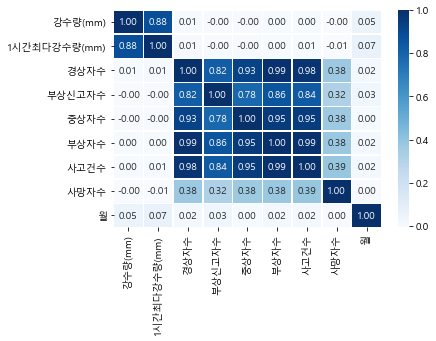

In [12]:
# 상관계수 히트맵
sns.heatmap(data=all2.corr(),annot=True,fmt='.2f',linewidths=.5,cmap='Blues')

In [13]:
# 지점별 대략적 상관 살펴보기 
all3=all2.groupby(['지점명']).sum()
all3.corr()

# 강수량과 교통사고 변수들 간의 낮은 상관을 보임 

,강수량(mm),1시간최다강수량(mm),경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,월
강수량(mm),1.000000,0.773784,-0.142982,-0.035351,-0.134576,-0.132065,-0.131182,-0.193073,NaN
1시간최다강수량(mm),0.773784,1.000000,-0.021296,0.074099,-0.010356,-0.010787,-0.011879,-0.044994,NaN
경상자수,-0.142982,-0.021296,1.000000,0.986638,0.999373,0.999845,0.999563,0.978055,NaN
부상신고자수,-0.035351,0.074099,0.986638,1.000000,0.987602,0.989118,0.988530,0.948051,NaN
중상자수,-0.134576,-0.010356,0.999373,0.987602,1.000000,0.999612,0.999561,0.977586,NaN
부상자수,-0.132065,-0.010787,0.999845,0.989118,0.999612,1.000000,0.999738,0.976461,NaN
사고건수,-0.131182,-0.011879,0.999563,0.988530,0.999561,0.999738,1.000000,0.974054,NaN
사망자수,-0.193073,-0.044994,0.978055,0.948051,0.977586,0.976461,0.974054,1.000000,NaN
월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
all3

,강수량(mm),1시간최다강수량(mm),경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,월
지점명,,,,,,,,,
고양,2267.00,945.000,8318,1066,2299,11683,7866,77,4764
과천,2186.50,868.000,509,99,157,765,476,2,4764
광명,2043.00,843.000,1805,633,586,3024,2144,21,4764
광주,2349.00,878.000,4126,401,966,5493,3558,39,4764
구리,2322.50,973.000,1532,141,396,2069,1419,17,4764
군포,2182.50,865.500,1262,264,452,1978,1309,10,4764
김포,2384.00,1003.500,3911,390,1150,5451,3474,48,4764
남양주,2337.50,907.000,5579,736,1431,7746,4842,72,4764
동두천,2528.10,866.300,785,73,283,1141,823,17,4764


<AxesSubplot:xlabel='날짜'>

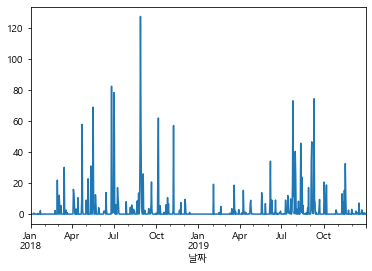

In [15]:
#날짜별 강수량 추이 
all2.groupby('날짜')['강수량(mm)'].mean().plot()

In [18]:
all2.groupby('연도').mean()

,강수량(mm),1시간최다강수량(mm),경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,월
연도,,,,,,,,,
2018,3.548927,1.268517,9.515541,1.128484,2.831365,13.475390,9.239206,0.099575,6.526027
2019,2.528380,1.113660,10.028720,1.200661,2.669910,13.899291,9.556353,0.089750,6.526027


In [19]:
all2.groupby('연도').sum()

,강수량(mm),1시간최다강수량(mm),경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,월
연도,,,,,,,,,
2018,37565.394,13427.254,100722,11945,29970,142637,97797,1054,69078
2019,26762.906,11788.092,106154,12709,28261,147124,101154,950,69078


In [22]:
all3=all2.groupby('연도').sum()
all4=all3.reset_index()

<AxesSubplot:xlabel='연도', ylabel='강수량(mm)'>

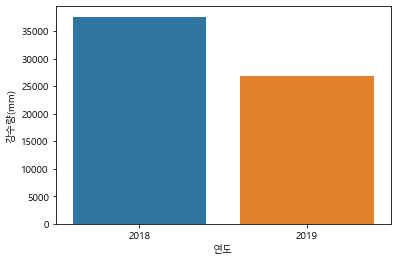

In [23]:
sns.barplot(all4['연도'],all4['강수량(mm)'])

<AxesSubplot:xlabel='날짜'>

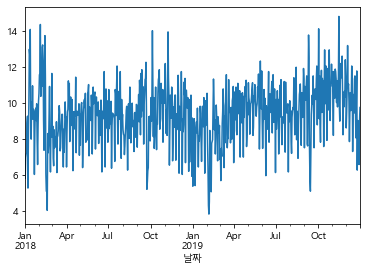

In [16]:
all2.groupby('날짜')['사고건수'].mean().plot()

<AxesSubplot:xlabel='연도', ylabel='사고건수'>

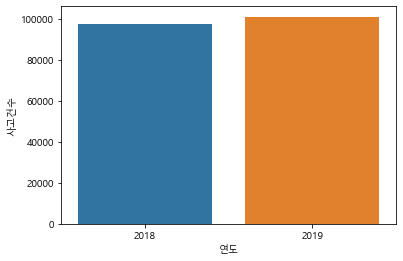

In [24]:
sns.barplot(all4['연도'],all4['사고건수'])

<AxesSubplot:xlabel='요일', ylabel='사고건수'>

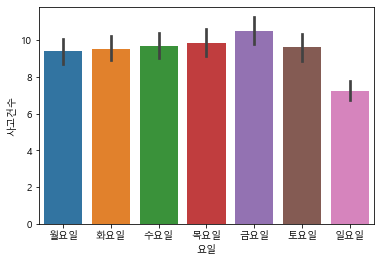

In [14]:
# 요일별 사고
sns.barplot(all2['요일'],all2['사고건수'])

<AxesSubplot:xlabel='요일', ylabel='부상자수'>

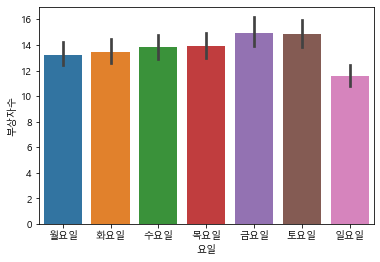

In [15]:
sns.barplot(all2['요일'],all2['부상자수'])

<AxesSubplot:xlabel='요일', ylabel='강수량(mm)'>

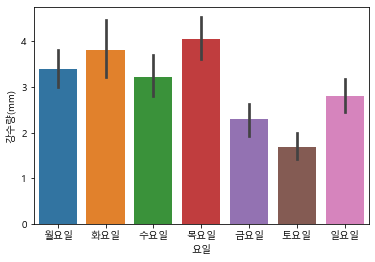

In [16]:
sns.barplot(all2['요일'],all2['강수량(mm)'])

<AxesSubplot:xlabel='요일', ylabel='1시간최다강수량(mm)'>

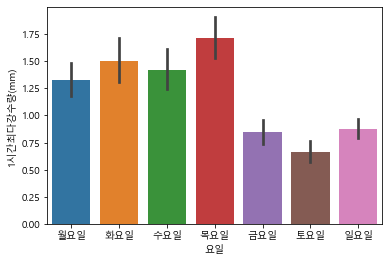

In [17]:
sns.barplot(all2['요일'],all2['1시간최다강수량(mm)'])


In [18]:
# 요일별 강수량과 사고건수를 살펴보면 강수량은 목요일이 가장 많이 오는 경향이 있지만 사고건수는 금요일에 피크임 이것만봐도 상관이 없어 보임.

<AxesSubplot:xlabel='월', ylabel='1시간최다강수량(mm)'>

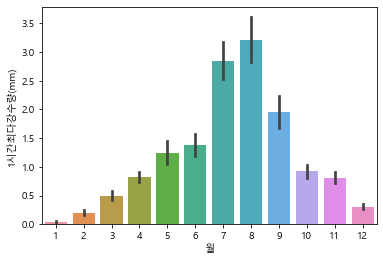

In [19]:
sns.barplot(all2['월'],all2['1시간최다강수량(mm)'])

<AxesSubplot:xlabel='월', ylabel='강수량(mm)'>

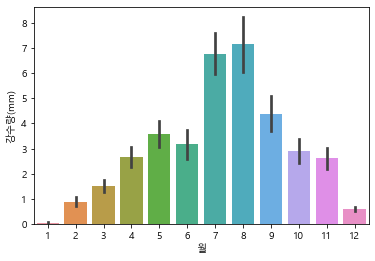

In [20]:
sns.barplot(all2['월'],all2['강수량(mm)'])

<AxesSubplot:xlabel='월', ylabel='사고건수'>

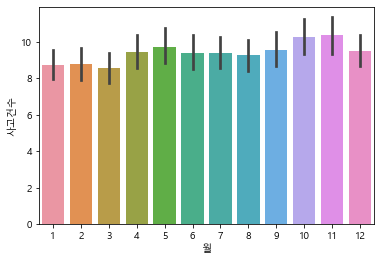

In [21]:
sns.barplot(all2['월'],all2['사고건수'])

<AxesSubplot:xlabel='월', ylabel='부상자수'>

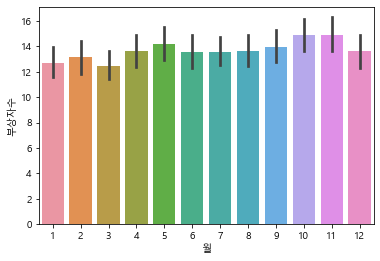

In [22]:
sns.barplot(all2['월'],all2['부상자수'])

<AxesSubplot:xlabel='사고건수', ylabel='강수량(mm)'>

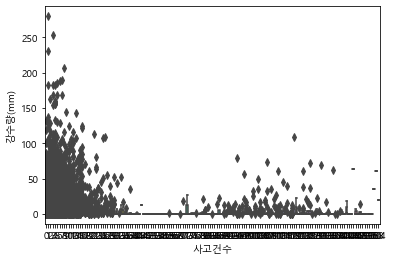

In [77]:
sns.boxplot(x='사고건수',y='강수량(mm)',data=all2)

## 지역별로 살펴보기

Text(0.5, 1.0, '도시별 사고건수')

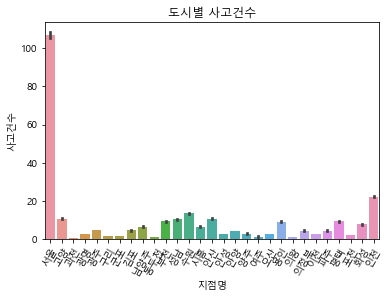

In [26]:
plt.xticks(rotation =  60 )
sns.barplot(all2['지점명'],all2['사고건수'])
plt.title('도시별 사고건수')
# 사고수는 대도시에 편중 특히 서울 

<AxesSubplot:xlabel='지점명', ylabel='부상자수'>

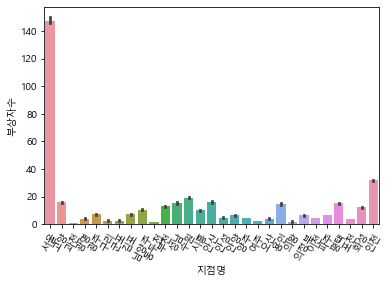

In [24]:
plt.xticks(rotation =  60 )
sns.barplot(all2['지점명'],all2['부상자수'])

<AxesSubplot:xlabel='지점명', ylabel='사망자수'>

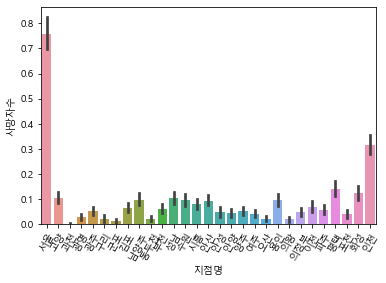

In [25]:
plt.xticks(rotation =  60 )
sns.barplot(all2['지점명'],all2['사망자수'])

Text(0.5, 1.0, '도시별 강수량')

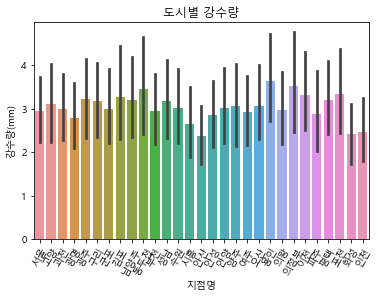

In [27]:
plt.xticks(rotation =  60 )
sns.barplot(all2['지점명'],all2['강수량(mm)'])
plt.title('도시별 강수량')

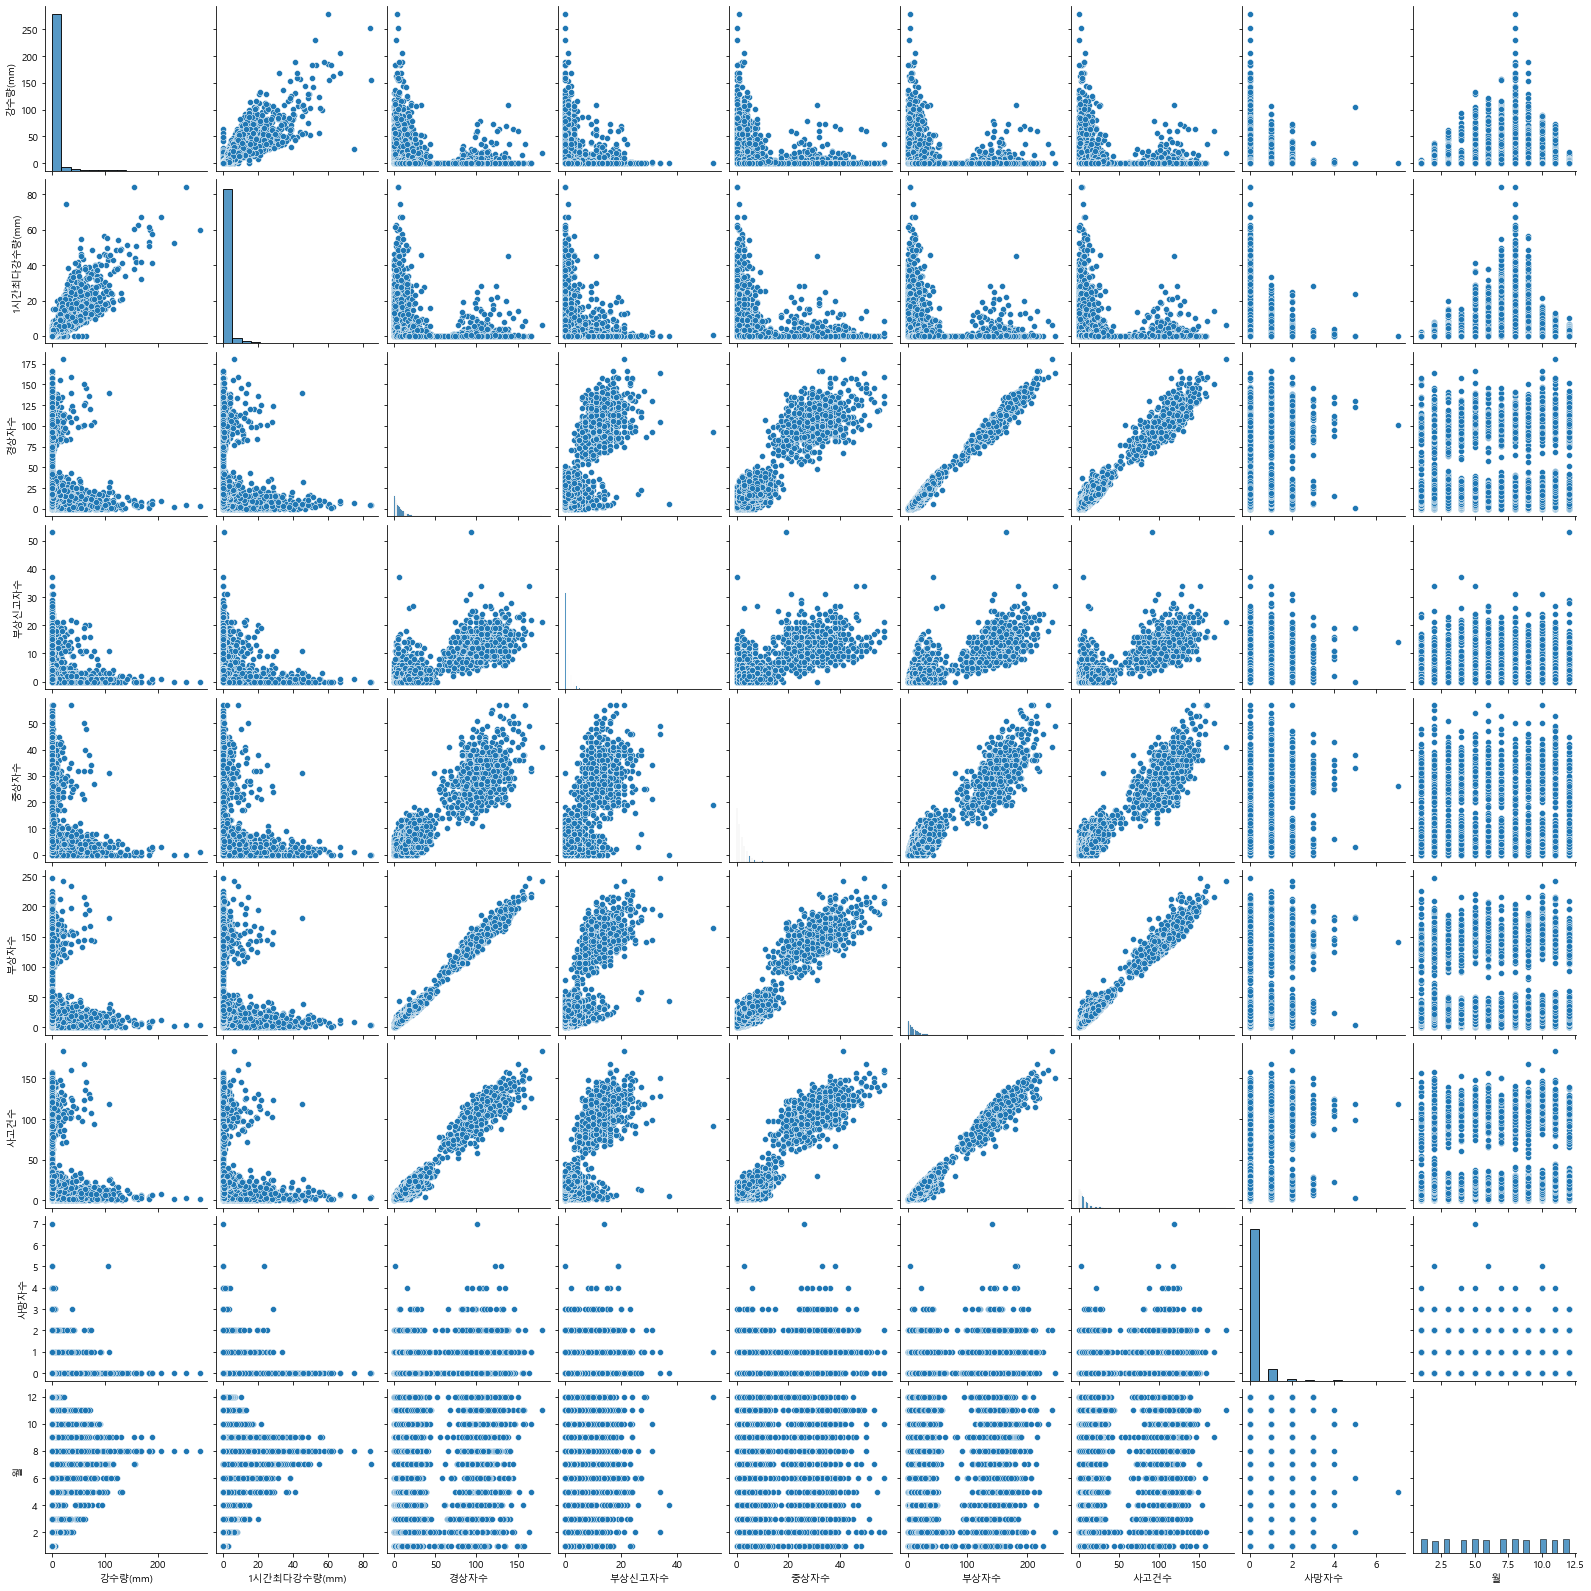

In [27]:
sns.pairplot(all2)

Text(0.5, 1.0, '강수량별 사고건수')

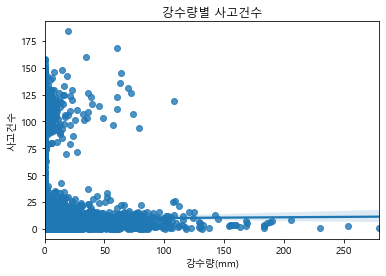

In [28]:
#강수량별 사고건수
sns.regplot(x='강수량(mm)',y='사고건수',data=all2)
plt.title('강수량별 사고건수')

Text(0.5, 1.0, '폭우별 사고건수')

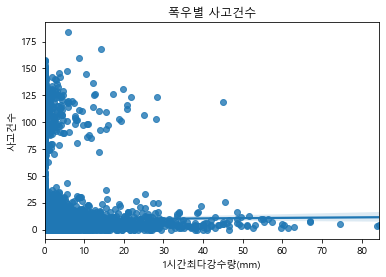

In [29]:
#폭우별 사고건수 
sns.regplot(x='1시간최다강수량(mm)',y='사고건수',data=all2)
plt.title('폭우별 사고건수')

Text(0.5, 1.0, '강수량별 사고건수')

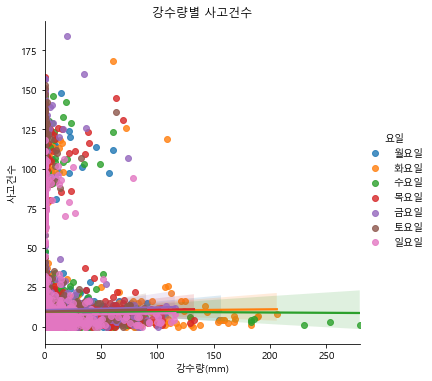

In [30]:
sns.lmplot(x='강수량(mm)',y='사고건수',data=all2,hue='요일')
plt.title('강수량별 사고건수')

## 정규화 해보기

In [33]:
import pandas as pd
from sklearn import preprocessing

In [38]:
columns = ["사망자수","중상자수","경상자수","부상자수","사고건수","강수량(mm)","1시간최다강수량(mm)"]
df2 = all2[columns]
x = df2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [39]:
df

,0,1,2,3,4,5,6
0,0.142857,0.561404,0.338889,0.404858,0.364130,0.000000,0.000000
1,0.000000,0.508772,0.322222,0.368421,0.423913,0.000000,0.000000
2,0.285714,0.491228,0.327778,0.396761,0.391304,0.000000,0.000000
3,0.428571,0.473684,0.361111,0.388664,0.440217,0.000000,0.000000
4,0.142857,0.614035,0.455556,0.538462,0.510870,0.000000,0.000000
...,...,...,...,...,...,...,...
21165,0.000000,0.105263,0.094444,0.101215,0.119565,0.000000,0.000000
21166,0.000000,0.105263,0.138889,0.141700,0.130435,0.000107,0.000355
21167,0.000000,0.070175,0.072222,0.072874,0.081522,0.003577,0.006864
21168,0.000000,0.087719,0.094444,0.097166,0.108696,0.000644,0.002840


In [41]:
column = ["날짜","지점명","요일", "월"]
df3 = all2[column]
df3 = df3.reset_index(drop=True)
df3

,날짜,지점명,요일,월
0,2018-01-01,서울,월요일,1
1,2018-01-02,서울,화요일,1
2,2018-01-03,서울,수요일,1
3,2018-01-04,서울,목요일,1
4,2018-01-05,서울,금요일,1
...,...,...,...,...
21165,2019-12-27,인천,금요일,12
21166,2019-12-28,인천,토요일,12
21167,2019-12-29,인천,일요일,12
21168,2019-12-30,인천,월요일,12


In [42]:
df3 = pd.concat([df3,df],axis=1)
df3 = df3.rename(columns={0:"사망자수",1:"중상자수",2:"경상자수",3:"부상자수",4:"사고건수",5:"강수량(mm)",6:"1시간최다강수량(mm)"})
df3

,날짜,지점명,요일,월,사망자수,중상자수,경상자수,부상자수,사고건수,강수량(mm),1시간최다강수량(mm)
0,2018-01-01,서울,월요일,1,0.142857,0.561404,0.338889,0.404858,0.364130,0.000000,0.000000
1,2018-01-02,서울,화요일,1,0.000000,0.508772,0.322222,0.368421,0.423913,0.000000,0.000000
2,2018-01-03,서울,수요일,1,0.285714,0.491228,0.327778,0.396761,0.391304,0.000000,0.000000
3,2018-01-04,서울,목요일,1,0.428571,0.473684,0.361111,0.388664,0.440217,0.000000,0.000000
4,2018-01-05,서울,금요일,1,0.142857,0.614035,0.455556,0.538462,0.510870,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
21165,2019-12-27,인천,금요일,12,0.000000,0.105263,0.094444,0.101215,0.119565,0.000000,0.000000
21166,2019-12-28,인천,토요일,12,0.000000,0.105263,0.138889,0.141700,0.130435,0.000107,0.000355
21167,2019-12-29,인천,일요일,12,0.000000,0.070175,0.072222,0.072874,0.081522,0.003577,0.006864
21168,2019-12-30,인천,월요일,12,0.000000,0.087719,0.094444,0.097166,0.108696,0.000644,0.002840


In [43]:
df3.corr()

,월,사망자수,중상자수,경상자수,부상자수,사고건수,강수량(mm),1시간최다강수량(mm)
월,1.000000,0.001556,0.004568,0.020703,0.018917,0.020727,0.052774,0.066288
사망자수,0.001556,1.000000,0.375279,0.377460,0.381547,0.391014,-0.002757,-0.005717
중상자수,0.004568,0.375279,1.000000,0.925539,0.953298,0.952516,-0.000636,-0.001569
경상자수,0.020703,0.377460,0.925539,1.000000,0.994605,0.983769,0.005751,0.006446
부상자수,0.018917,0.381547,0.953298,0.994605,1.000000,0.990287,0.003965,0.004240
사고건수,0.020727,0.391014,0.952516,0.983769,0.990287,1.000000,0.004392,0.005474
강수량(mm),0.052774,-0.002757,-0.000636,0.005751,0.003965,0.004392,1.000000,0.882488
1시간최다강수량(mm),0.066288,-0.005717,-0.001569,0.006446,0.004240,0.005474,0.882488,1.000000


<AxesSubplot:>

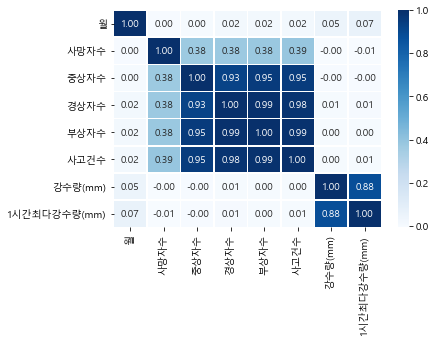

In [44]:
sns.heatmap(data = df3.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
# 정규화를 해도 상관은 높지 않음

## 도시별 

### 1. 서울

In [28]:
soeul =all2[all2['지점명']=='서울']
soeul

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,요일,월,연도
0,2018-01-01,0.000,0.00,서울,61,7,32,100,67,1,월요일,1,2018
1,2018-01-02,0.000,0.00,서울,58,4,29,91,78,0,화요일,1,2018
2,2018-01-03,0.000,0.00,서울,59,11,28,98,72,2,수요일,1,2018
3,2018-01-04,0.000,0.00,서울,65,4,27,96,81,3,목요일,1,2018
4,2018-01-05,0.000,0.00,서울,82,16,35,133,94,1,금요일,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,0.000,0.00,서울,88,14,27,129,94,0,금요일,12,2019
726,2019-12-28,0.000,0.00,서울,105,10,27,142,94,0,토요일,12,2019
727,2019-12-29,0.906,0.56,서울,87,7,26,120,78,1,일요일,12,2019
728,2019-12-30,0.226,0.32,서울,93,53,19,165,91,1,월요일,12,2019


Text(0.5, 1.0, '[서울]강수,교통사고 상관관계')

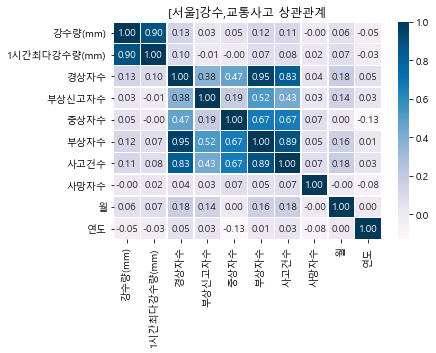

In [34]:
sns.heatmap(data = soeul.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='PuBu')
plt.title('[서울]강수,교통사고 상관관계')

In [29]:
#서울 상관 --> 전혀 없음
soeul.corr()


,강수량(mm),1시간최다강수량(mm),경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,월,연도
강수량(mm),1.000000,0.895723,0.132881,0.027449,0.049060,0.118438,0.113468,-0.003314,5.590016e-02,-4.539294e-02
1시간최다강수량(mm),0.895723,1.000000,0.097908,-0.005699,-0.004371,0.070975,0.075857,0.016952,6.914620e-02,-3.396519e-02
경상자수,0.132881,0.097908,1.000000,0.380250,0.470804,0.952094,0.831098,0.036646,1.825181e-01,5.282565e-02
부상신고자수,0.027449,-0.005699,0.380250,1.000000,0.194742,0.523406,0.433580,0.025327,1.430626e-01,2.866476e-02
중상자수,0.049060,-0.004371,0.470804,0.194742,1.000000,0.672744,0.668447,0.073767,3.767648e-03,-1.311419e-01
부상자수,0.118438,0.070975,0.952094,0.523406,0.672744,1.000000,0.891759,0.053071,1.638916e-01,7.448299e-03
사고건수,0.113468,0.075857,0.831098,0.433580,0.668447,0.891759,1.000000,0.070105,1.757602e-01,3.116128e-02
사망자수,-0.003314,0.016952,0.036646,0.025327,0.073767,0.053071,0.070105,1.000000,-1.467489e-03,-7.990894e-02
월,0.055900,0.069146,0.182518,0.143063,0.003768,0.163892,0.175760,-0.001467,1.000000e+00,7.976995e-13
연도,-0.045393,-0.033965,0.052826,0.028665,-0.131142,0.007448,0.031161,-0.079909,7.976995e-13,1.000000e+00


<AxesSubplot:xlabel='날짜'>

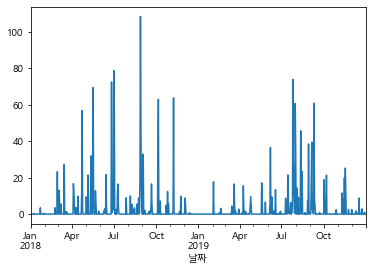

In [51]:
#날짜별 강수량 추이 
soeul.groupby('날짜')['강수량(mm)'].mean().plot()

<AxesSubplot:xlabel='날짜'>

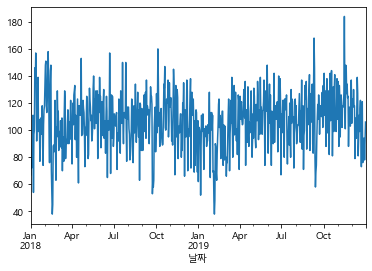

In [52]:
#날짜별 사고건수 추이 
soeul.groupby('날짜')['사고건수'].mean().plot()

Text(0.5, 1.0, '[서울]강수,교통사고 상관관계')

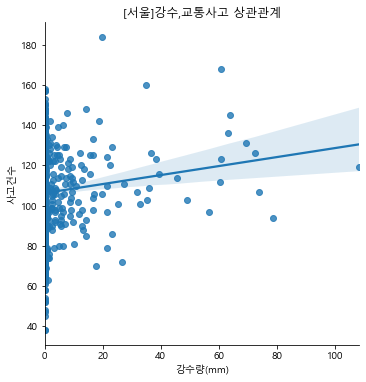

In [36]:
sns.lmplot(x='강수량(mm)',y='사고건수',data=soeul)

plt.title('[서울]강수,교통사고 상관관계')

### 인천 


In [59]:
all2['지점명'].unique()

array(['서울', '고양', '과천', '광명', '광주', '구리', '군포', '김포', '남양주', '동두천', '부천',
       '성남', '수원', '시흥', '안산', '안성', '안양', '양주', '여주', '오산', '용인', '의왕',
       '의정부', '이천', '파주', '평택', '포천', '화성', '인천'], dtype=object)

In [38]:
incheon =all2[all2['지점명']=='인천']
incheon

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,요일,월,연도
20440,2018-01-01,0.00,0.00,인천,22,1,5,28,18,0,월요일,1,2018
20441,2018-01-02,0.00,0.00,인천,18,0,6,24,15,0,화요일,1,2018
20442,2018-01-03,0.00,0.00,인천,18,1,5,24,20,0,수요일,1,2018
20443,2018-01-04,0.00,0.00,인천,21,1,4,26,18,0,목요일,1,2018
20444,2018-01-05,0.00,0.00,인천,14,1,8,23,16,0,금요일,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21165,2019-12-27,0.00,0.00,인천,17,2,6,25,22,0,금요일,12,2019
21166,2019-12-28,0.03,0.03,인천,25,4,6,35,24,0,토요일,12,2019
21167,2019-12-29,1.00,0.58,인천,13,1,4,18,15,0,일요일,12,2019
21168,2019-12-30,0.18,0.24,인천,17,2,5,24,20,0,월요일,12,2019


Text(0.5, 1.0, '[인천]강수,교통사고 상관관계')

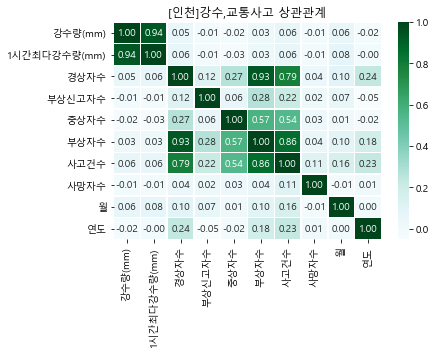

In [39]:
sns.heatmap(data = incheon.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='BuGn')
plt.title('[인천]강수,교통사고 상관관계')

In [61]:
incheon.corr() # --> 전혀 상관이 없음

,강수량(mm),1시간최다강수량(mm),경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,월
강수량(mm),1.000000,0.935878,0.052832,-0.008759,-0.024366,0.033723,0.061314,-0.008916,0.057493
1시간최다강수량(mm),0.935878,1.000000,0.056831,-0.014784,-0.031192,0.033742,0.062457,-0.011791,0.078181
경상자수,0.052832,0.056831,1.000000,0.119810,0.269085,0.930607,0.786863,0.039358,0.099583
부상신고자수,-0.008759,-0.014784,0.119810,1.000000,0.061218,0.277111,0.221715,0.018767,0.067857
중상자수,-0.024366,-0.031192,0.269085,0.061218,1.000000,0.568916,0.540635,0.028593,0.010346
부상자수,0.033723,0.033742,0.930607,0.277111,0.568916,1.000000,0.863715,0.044941,0.095946
사고건수,0.061314,0.062457,0.786863,0.221715,0.540635,0.863715,1.000000,0.109128,0.157579
사망자수,-0.008916,-0.011791,0.039358,0.018767,0.028593,0.044941,0.109128,1.000000,-0.010409
월,0.057493,0.078181,0.099583,0.067857,0.010346,0.095946,0.157579,-0.010409,1.000000


<AxesSubplot:xlabel='날짜'>

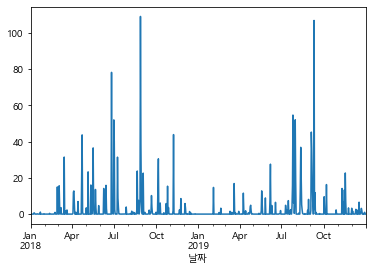

In [62]:
#날짜별 강수량 추이 
incheon.groupby('날짜')['강수량(mm)'].mean().plot()

<AxesSubplot:xlabel='날짜'>

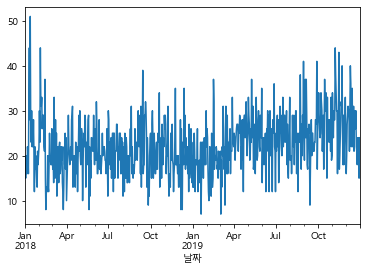

In [63]:
#날짜별 강수량 추이 
incheon.groupby('날짜')['사고건수'].mean().plot()

Text(0.5, 1.0, '[인천]강수,교통사고 상관관계')

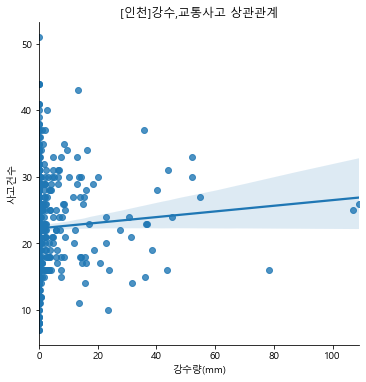

In [40]:
sns.lmplot(x='강수량(mm)',y='사고건수',data=incheon)
plt.title('[인천]강수,교통사고 상관관계')
# --> 전혀 관련이 없어 보임 

### 경기

In [41]:
g = all2[(all2['지점명']!='서울') & (all2['지점명']!='인천')]
g

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,요일,월,연도
730,2018-01-01,0.0,0.0,고양,12,0,2,14,7,0,월요일,1,2018
731,2018-01-02,0.0,0.0,고양,14,0,2,16,10,0,화요일,1,2018
732,2018-01-03,0.0,0.0,고양,15,2,2,19,17,1,수요일,1,2018
733,2018-01-04,0.0,0.0,고양,10,3,2,15,14,1,목요일,1,2018
734,2018-01-05,0.0,0.0,고양,14,2,8,24,16,0,금요일,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20435,2019-12-27,0.0,0.0,화성,18,1,1,20,12,0,금요일,12,2019
20436,2019-12-28,0.0,0.0,화성,9,0,0,9,7,0,토요일,12,2019
20437,2019-12-29,0.5,0.5,화성,8,0,0,8,3,0,일요일,12,2019
20438,2019-12-30,0.5,0.5,화성,8,0,2,10,8,0,월요일,12,2019


In [42]:
g.corr() # 경기도도 전혀 상관을 보이지 않음 

,강수량(mm),1시간최다강수량(mm),경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,월,연도
강수량(mm),1.000000,0.881011,0.013574,-0.000064,0.000872,0.010472,0.013937,-0.000694,5.263287e-02,-4.252256e-02
1시간최다강수량(mm),0.881011,1.000000,0.009209,-0.001049,-0.003693,0.005832,0.010709,-0.008826,6.592909e-02,-1.765130e-02
경상자수,0.013574,0.009209,1.000000,0.356006,0.532718,0.957501,0.880982,0.104949,4.791332e-02,3.037207e-02
부상신고자수,-0.000064,-0.001049,0.356006,1.000000,0.261394,0.522229,0.423362,0.051889,4.549356e-02,2.702610e-02
중상자수,0.000872,-0.003693,0.532718,0.261394,1.000000,0.704811,0.692057,0.104245,1.430739e-02,-2.526446e-02
부상자수,0.010472,0.005832,0.957501,0.522229,0.704811,1.000000,0.920439,0.115441,4.835120e-02,2.161855e-02
사고건수,0.013937,0.010709,0.880982,0.423362,0.692057,0.920439,1.000000,0.156227,6.011735e-02,2.093790e-02
사망자수,-0.000694,-0.008826,0.104949,0.051889,0.104245,0.115441,0.156227,1.000000,3.309967e-03,-1.067972e-02
월,0.052633,0.065929,0.047913,0.045494,0.014307,0.048351,0.060117,0.003310,1.000000e+00,-2.963202e-14
연도,-0.042523,-0.017651,0.030372,0.027026,-0.025264,0.021619,0.020938,-0.010680,-2.963202e-14,1.000000e+00


Text(0.5, 1.0, '[경기]강수,교통사고 상관관계')

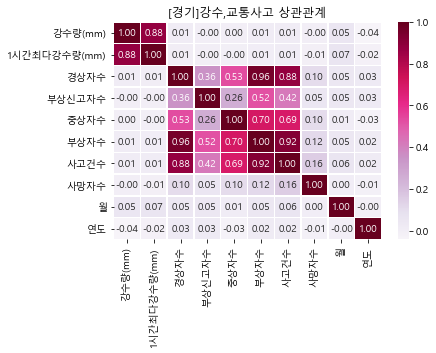

In [45]:
sns.heatmap(data = g.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='PuRd')
plt.title('[경기]강수,교통사고 상관관계')

<AxesSubplot:xlabel='날짜'>

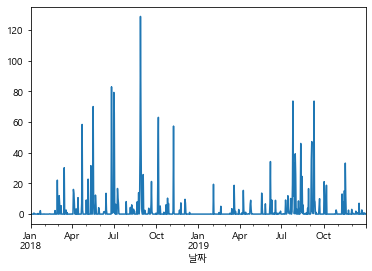

In [69]:
#날짜별 강수량 추이 
g.groupby('날짜')['강수량(mm)'].mean().plot()

<AxesSubplot:xlabel='날짜'>

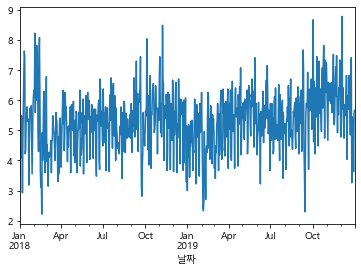

In [70]:
#날짜별 사고건수 추이 
g.groupby('날짜')['사고건수'].mean().plot()

Text(0.5, 1.0, '[경기]강수,교통사고 상관관계')

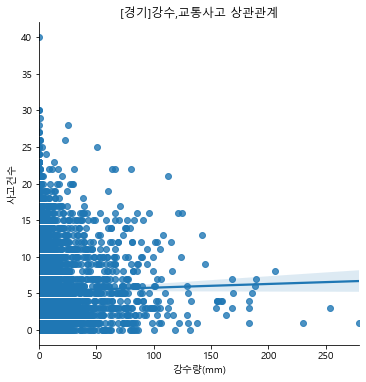

In [46]:
sns.lmplot(x='강수량(mm)',y='사고건수',data=g)
plt.title('[경기]강수,교통사고 상관관계')
# --> 전혀 관련이 없어 보임 